In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
lista = ['Comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'classe']
df.columns = lista
df

,Comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
classes = df['classe'].unique()
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
X = df.iloc[:, 0:4].values
y = df['classe'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [8]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, input_dim=4,activation='relu', name='oculta' ))
model.add(tf.keras.layers.Dense(units=3, activation='softmax', name='saida'))

# Resumo do modelo
model.summary()

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ oculta (Dense)                  │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['mse'])


In [10]:
history = model.fit(X_train_std, y_train_onehot, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - loss: 1.0550 - mse: 0.2106 - val_loss: 0.8127 - val_mse: 0.1560
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8079 - mse: 0.1553 - val_loss: 0.6250 - val_mse: 0.1161
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6572 - mse: 0.1236 - val_loss: 0.5028 - val_mse: 0.0919
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5577 - mse: 0.1048 - val_loss: 0.4258 - val_mse: 0.0785
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4764 - mse: 0.0904 - val_loss: 0.3771 - val_mse: 0.0713
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4248 - mse: 0.0823 - val_loss: 0.3438 - val_mse: 0.0668
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4086 - mse: 0.0819 - val_loss: 0.3170 - val_mse: 0.0629
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3760 - mse: 0.0762 - val_loss: 0.2925 - val_mse: 0.0590
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3560 - mse:

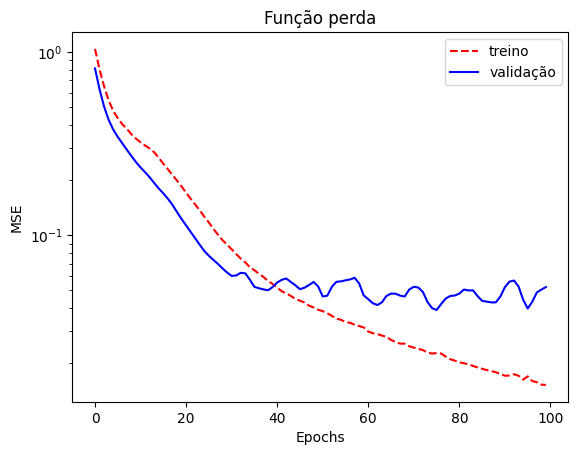

In [11]:
plt.plot(history.history['loss'], 'r--', label='train')
plt.plot(history.history['val_loss'],'b-', label='validation')
plt.title("Função perda")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.yscale('log')
plt.legend(['treino', 'validação'], loc='upper right')

plt.show()

In [12]:
output_model = np.argmax(model.predict(X_test_std), axis=-1)
y_test_class = np.argmax(y_test_onehot, axis=-1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


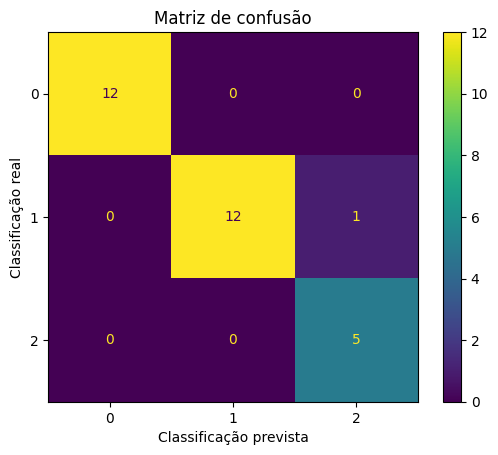

In [13]:
cm = confusion_matrix(y_test_class, output_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Matriz de confusão")
disp.ax_.set_xlabel("Classificação prevista")
disp.ax_.set_ylabel("Classificação real")
plt.show()

In [14]:
from sklearn.metrics import precision_score

precision_score(y_test_class, output_model, average='macro')

0.9444444444444445

In [16]:
import shap

def model_predict(x):
    return np.argmax(model.predict(x), axis=-1)

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  0%|          | 0/30 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


  3%|▎         | 1/30 [00:00<00:07,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  7%|▋         | 2/30 [00:00<00:06,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 10%|█         | 3/30 [00:00<00:05,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 13%|█▎        | 4/30 [00:00<00:06,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 17%|█▋        | 5/30 [00:01<00:05,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 20%|██        | 6/30 [00:01<00:05,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


 23%|██▎       | 7/30 [00:01<00:05,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 27%|██▋       | 8/30 [00:01<00:04,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 30%|███       | 9/30 [00:02<00:04,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 33%|███▎      | 10/30 [00:02<00:04,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 37%|███▋      | 11/30 [00:02<00:04,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 40%|████      | 12/30 [00:02<00:04,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 43%|████▎     | 13/30 [00:03<00:05,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 47%|████▋     | 14/30 [00:03<00:04,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 50%|█████     | 15/30 [00:03<00:04,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 53%|█████▎    | 16/30 [00:04<00:04,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 57%|█████▋    | 17/30 [00:04<00:03,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 60%|██████    | 18/30 [00:04<00:03,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 63%|██████▎   | 19/30 [00:04<00:03,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 67%|██████▋   | 20/30 [00:05<00:02,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 70%|███████   | 21/30 [00:05<00:02,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 73%|███████▎  | 22/30 [00:05<00:02,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 77%|███████▋  | 23/30 [00:06<00:02,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 80%|████████  | 24/30 [00:06<00:01,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 83%|████████▎ | 25/30 [00:06<00:01,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 87%|████████▋ | 26/30 [00:06<00:00,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 90%|█████████ | 27/30 [00:06<00:00,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 93%|█████████▎| 28/30 [00:07<00:00,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 97%|█████████▋| 29/30 [00:07<00:00,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


100%|██████████| 30/30 [00:07<00:00,  3.98it/s]


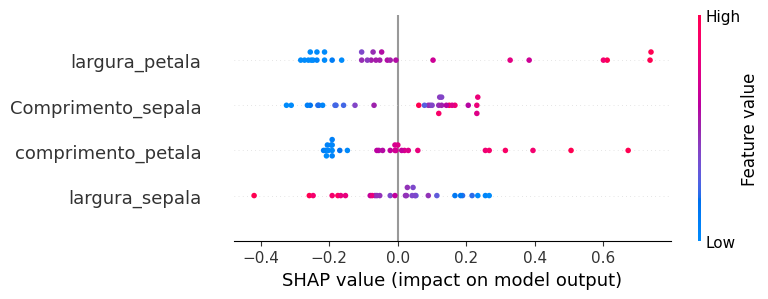

In [17]:
explainer = shap.KernelExplainer(model_predict, X_test_std)
shap_values = explainer.shap_values(X_test_std)

shap.summary_plot(shap_values, X_test_std, feature_names=lista)

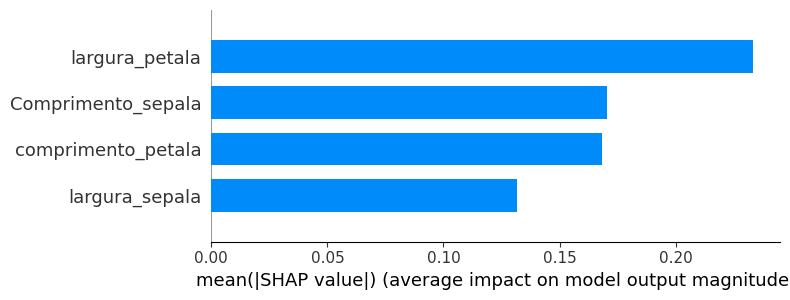

In [18]:
shap.summary_plot(shap_values, X_test_std, plot_type='bar', feature_names=lista, class_names=classes)

In [21]:
shap.initjs()
p=shap.force_plot(explainer.expected_value, shap_values, X_test_std, show=False)
display(p)